# loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv('C:/Users/navyakiran/Desktop/python/Regression/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['target'].unique()

array([1, 0], dtype=int64)

In [9]:
data['target'].count()

303

In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Exploratory Data Analysis

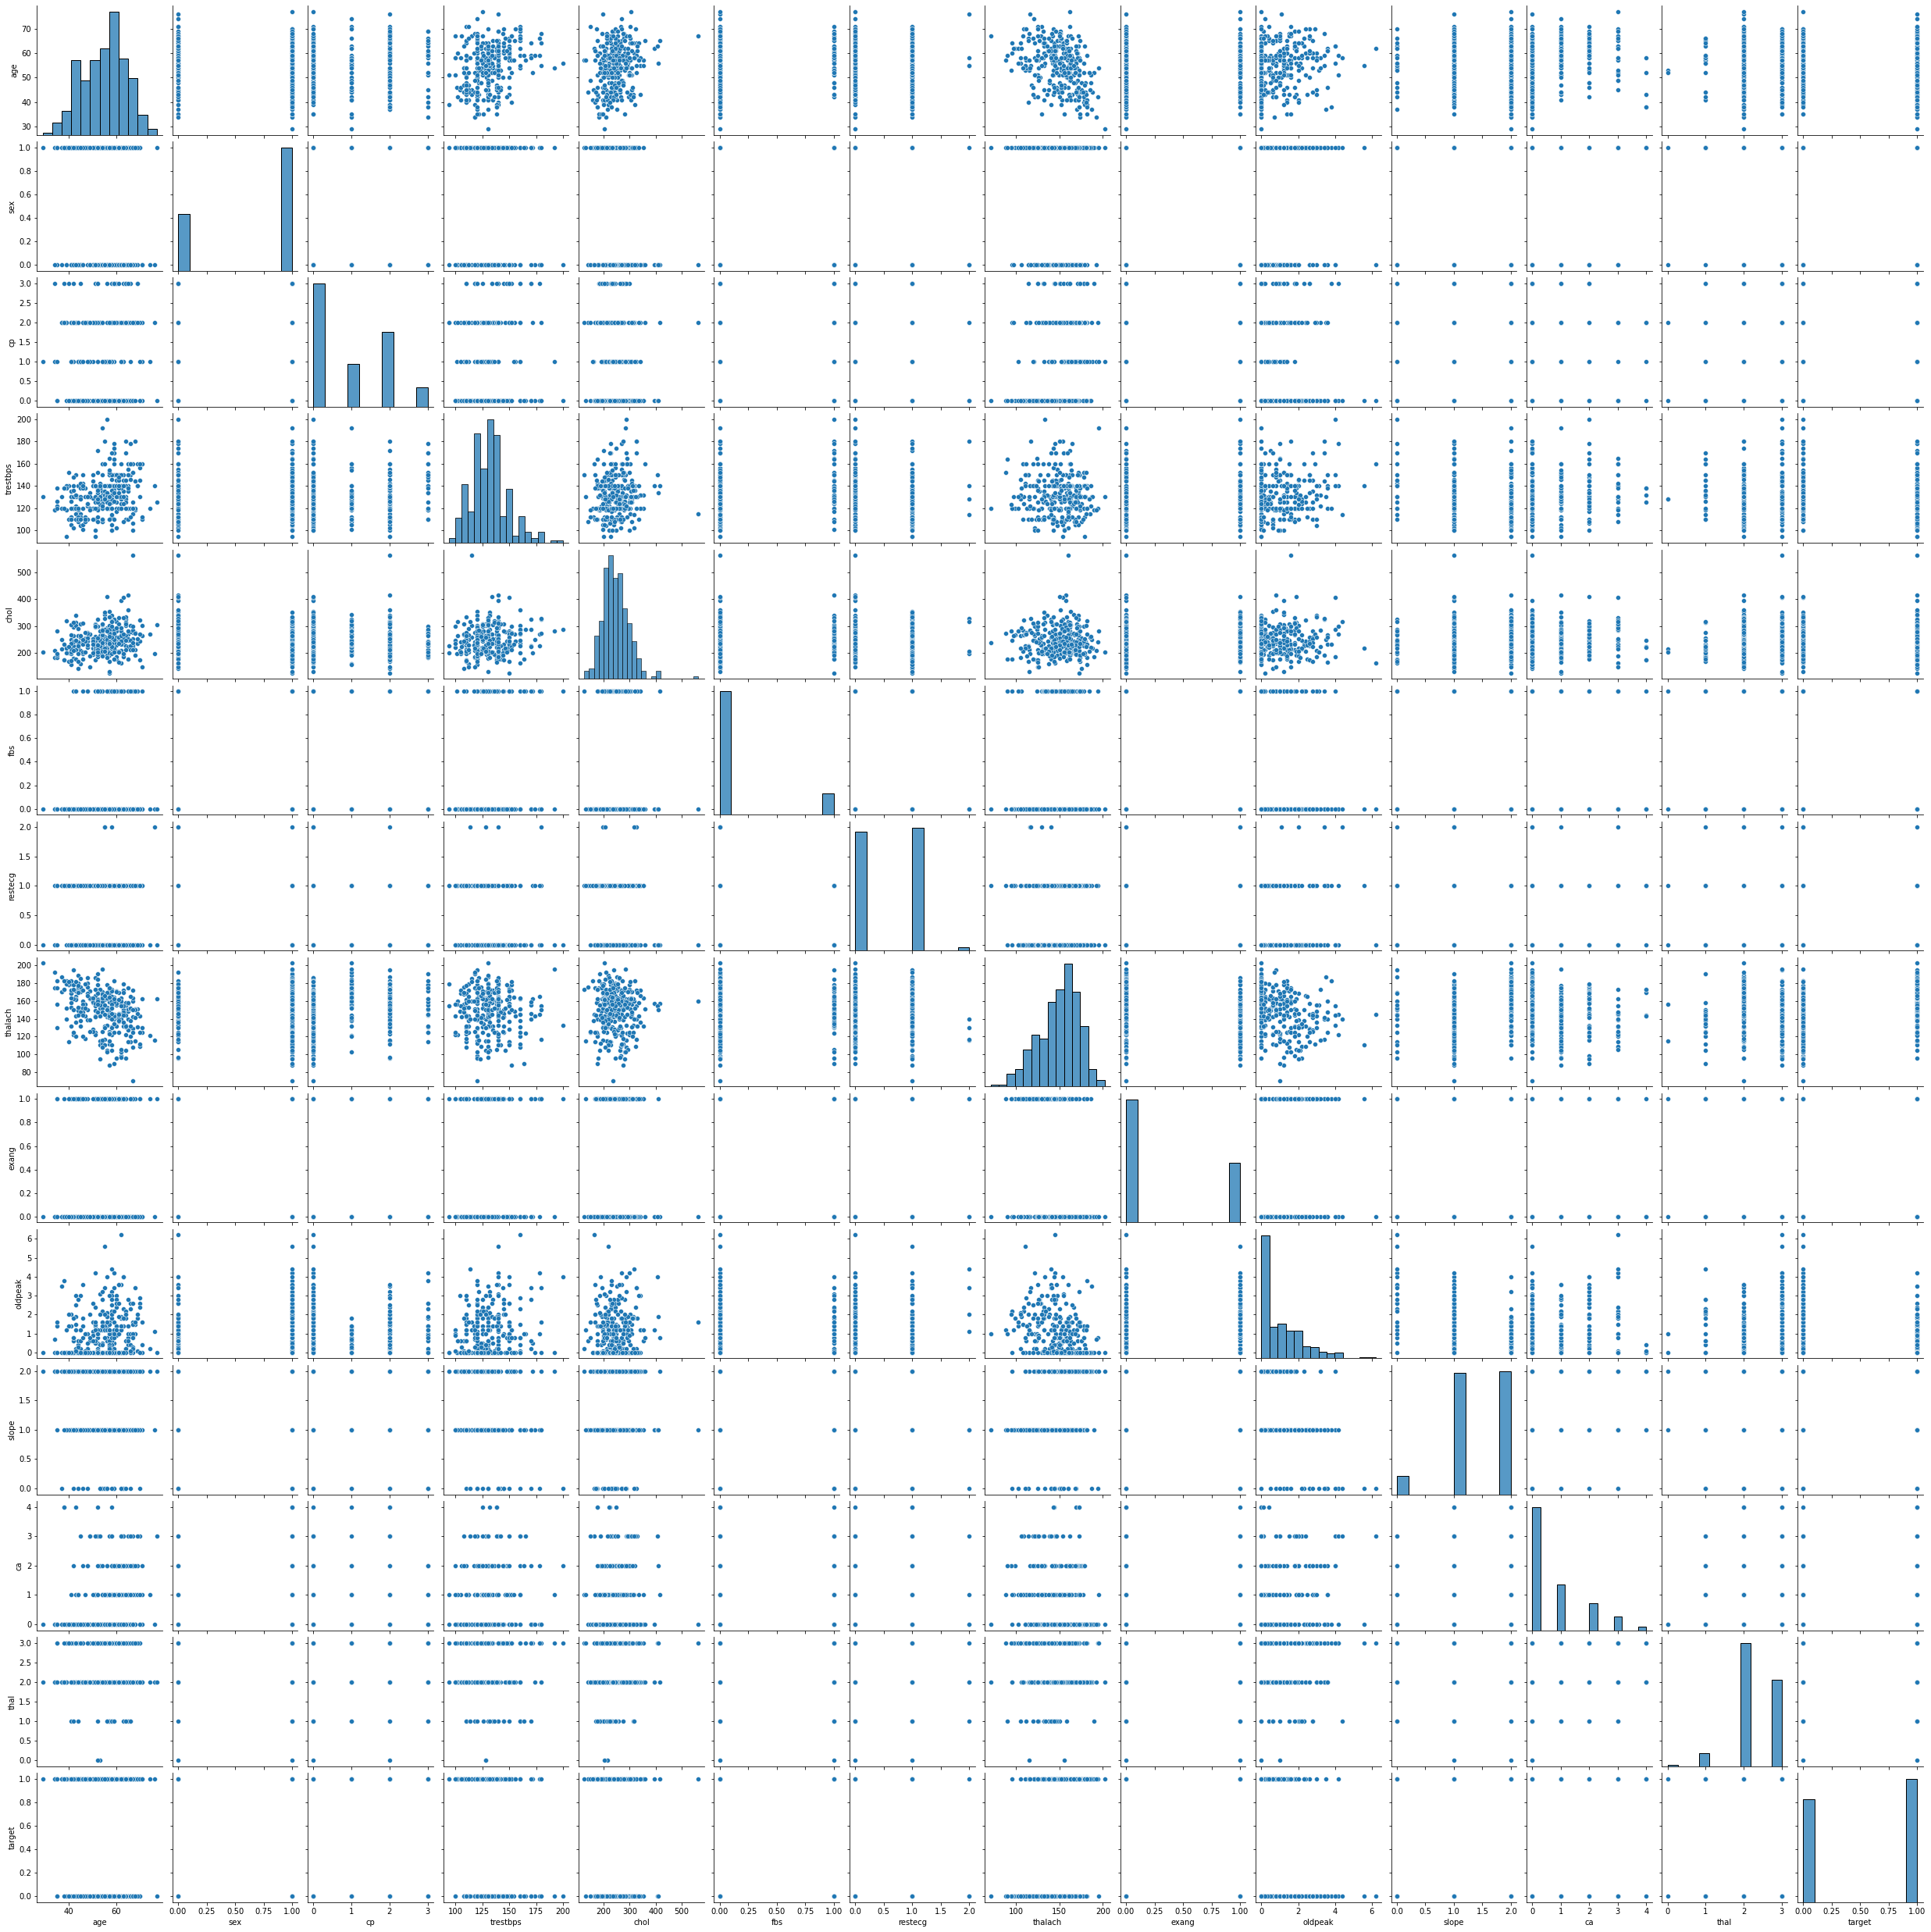

In [11]:
sn.pairplot(data)

In [12]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

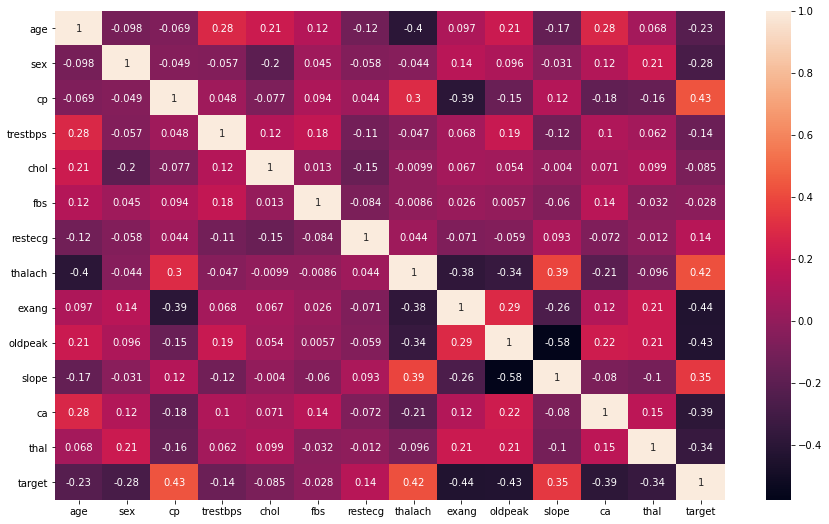

In [13]:
plt.figure(figsize=(15,9))
sn.heatmap(data.corr(),annot=True)

In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
data['trestbps'].value_counts

<bound method IndexOpsMixin.value_counts of 0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64>

In [17]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [18]:
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [19]:
data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [20]:
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [21]:
data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [22]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
cont_var=['age','trestbps','chol','thalach','oldpeak']

# Exploratory Data Analysis

C:\Users\navyakiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


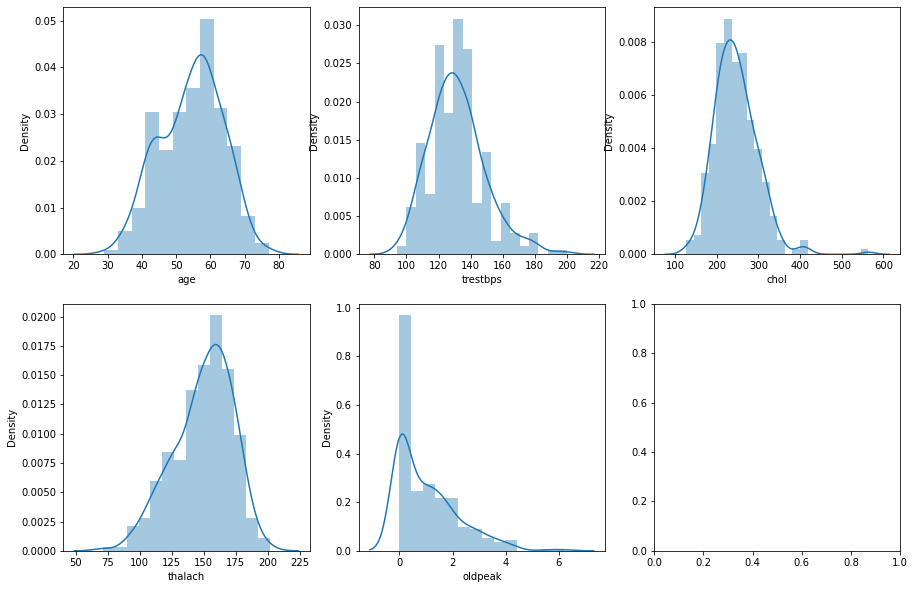

In [25]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
for var,subplot in zip(cont_var,ax.flatten()):
    sn.distplot(data[var],ax=subplot)
    import warnings
    warnings.filterwarnings('ignore')

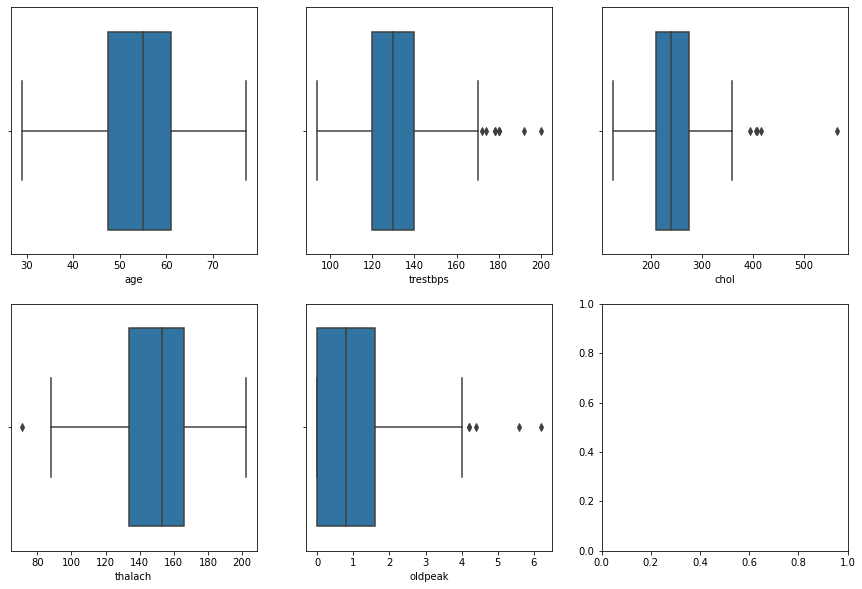

In [26]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
for var1, subplot in zip(cont_var,ax.flatten()):
    sn.boxplot(data[var1],ax=subplot)
    import warnings
    warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='chol', ylabel='Density'>

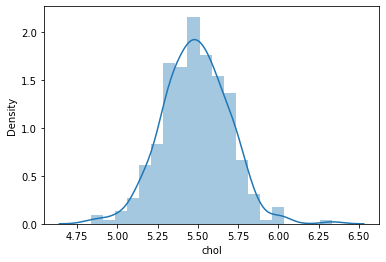

In [27]:
sn.distplot(np.log(data['chol']))

<AxesSubplot:xlabel='chol'>

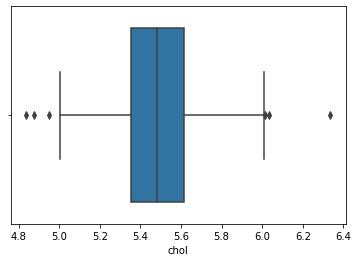

In [28]:
sn.boxplot(np.log(data['chol']))

In [29]:
data['chol'].max()

564

In [30]:
np.where(data['chol']==564)

(array([85], dtype=int64),)

In [31]:
data=data.drop(data.index[85])
data.shape

(302, 14)

<AxesSubplot:xlabel='chol', ylabel='Density'>

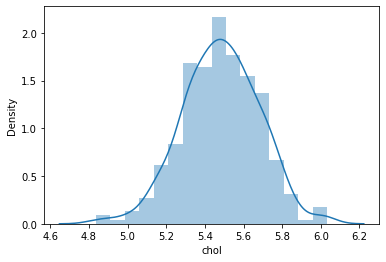

In [32]:
sn.distplot(np.log(data['chol']))

In [33]:
data['chol']=np.log(data['chol'])

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

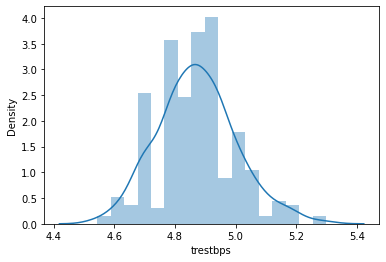

In [34]:
sn.distplot(np.log(data['trestbps']))

<AxesSubplot:xlabel='trestbps'>

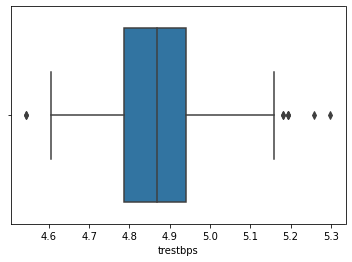

In [35]:
sn.boxplot(np.log(data['trestbps']))

In [36]:
data['trestbps'].max()

200

In [37]:
np.where(data['trestbps']==200)

(array([222], dtype=int64),)

In [38]:
data=data.drop(data.index[222])
data.shape

(301, 14)

<AxesSubplot:xlabel='trestbps'>

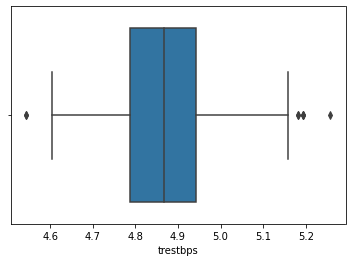

In [39]:
sn.boxplot(np.log(data['trestbps']))

In [40]:
data['trestbps'].max()

192

In [41]:
np.where(data['trestbps']==192)

(array([246], dtype=int64),)

In [42]:
data=data.drop(data.index[246])
data.shape

(300, 14)

<AxesSubplot:xlabel='trestbps'>

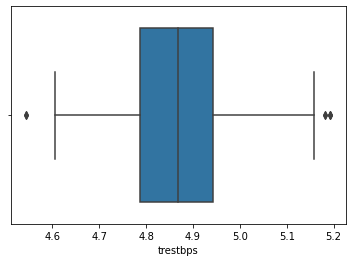

In [43]:
sn.boxplot(np.log(data['trestbps']))

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

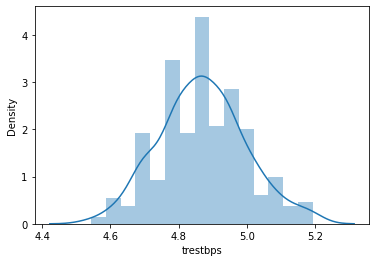

In [44]:
sn.distplot(np.log(data['trestbps']))

In [45]:
data['trestbps']=np.log(data['trestbps'])

<AxesSubplot:xlabel='thalach', ylabel='Density'>

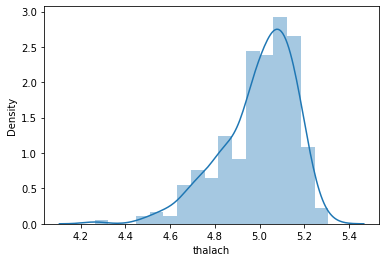

In [46]:
sn.distplot(np.log(data['thalach']))

In [47]:
data['thalach'].min()

71

In [48]:
data['thalach'].mean()

149.51666666666668

In [49]:
np.where(data['thalach']==71)

(array([269], dtype=int64),)

In [50]:
data.iloc[265:272]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,4.804021,5.655992,0,0,116,1,3.2,1,2,2,0
269,56,1,0,4.867534,5.645447,1,0,103,1,1.6,0,0,3,0
270,46,1,0,4.787492,5.517453,0,0,144,0,0.8,2,0,3,0
271,61,1,3,4.897840,5.455321,0,1,145,0,2.6,1,2,2,0
272,67,1,0,4.787492,5.468060,0,1,71,0,1.0,1,0,2,0
273,58,1,0,4.605170,5.455321,0,1,156,0,0.1,2,1,3,0
274,47,1,0,4.700480,5.616771,0,0,118,1,1.0,1,1,2,0


In [51]:
data['thalach']=data['thalach'].replace(data['thalach'][272],150)

In [52]:
data.iloc[267:271]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,4.787492,5.517453,0,0,144,0,0.8,2,0,3,0
271,61,1,3,4.897840,5.455321,0,1,145,0,2.6,1,2,2,0
272,67,1,0,4.787492,5.468060,0,1,150,0,1.0,1,0,2,0
273,58,1,0,4.605170,5.455321,0,1,156,0,0.1,2,1,3,0


In [53]:
data['thalach'][272]

150

<AxesSubplot:xlabel='thalach', ylabel='Density'>

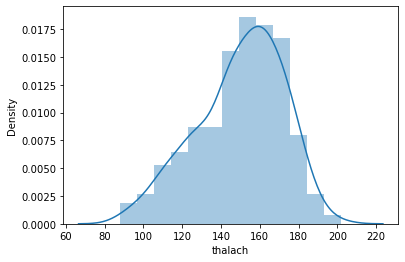

In [54]:
sn.distplot(data['thalach'])

<AxesSubplot:xlabel='thalach'>

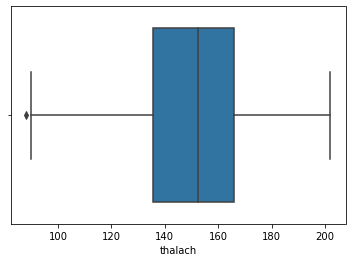

In [55]:
sn.boxplot(data['thalach'])

In [56]:
data['thalach'].min()

88

In [57]:
np.where(data['thalach']==88)

(array([241], dtype=int64),)

In [58]:
data.iloc[241:243]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
243,57,1,0,5.023881,5.613128,0,1,88,1,1.2,1,1,3,0
244,56,1,0,4.882802,5.214936,0,0,105,1,2.1,1,1,1,0


In [59]:
data['thalach']=data['thalach'].replace(data['thalach'][243],150)

In [60]:
data.iloc[241:245]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
243,57,1,0,5.023881,5.613128,0,1,150,1,1.2,1,1,3,0
244,56,1,0,4.882802,5.214936,0,0,105,1,2.1,1,1,1,0
245,48,1,0,4.820282,5.613128,0,0,166,0,0.5,1,0,3,0
246,56,0,0,4.897840,6.013715,0,0,150,1,1.9,1,2,3,0


<AxesSubplot:xlabel='thalach', ylabel='Density'>

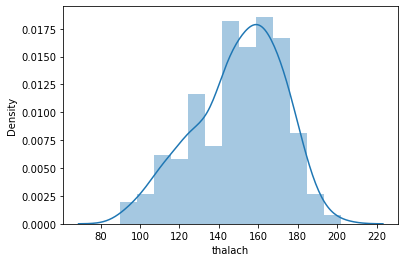

In [61]:
sn.distplot(data['thalach'])

<AxesSubplot:xlabel='thalach'>

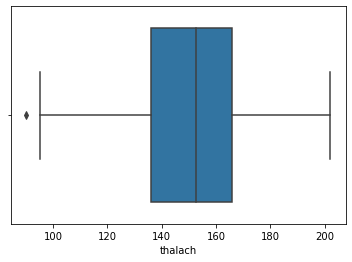

In [62]:
sn.boxplot(data['thalach'])

In [63]:
data['thalach'].min()

90

In [64]:
np.where(data['thalach']==90)

(array([294], dtype=int64),)

In [65]:
data.iloc[294:295]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,59,1,0,5.099866,5.170484,1,0,90,0,1.0,1,2,1,0


In [66]:
data['thalach']=data['thalach'].replace(data['thalach'][297],150)

<AxesSubplot:xlabel='thalach', ylabel='Density'>

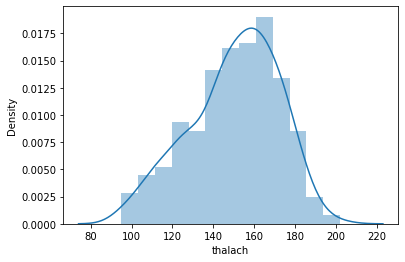

In [67]:
sn.distplot(data['thalach'])

<AxesSubplot:xlabel='thalach'>

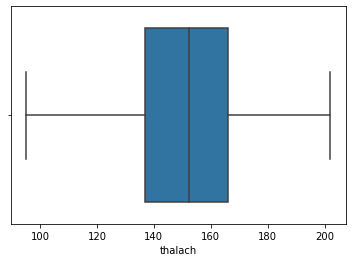

In [68]:
sn.boxplot(data['thalach'])

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

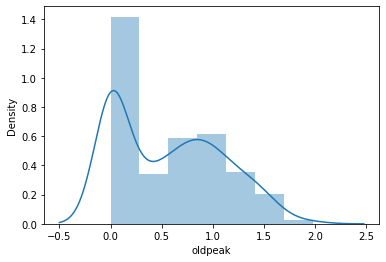

In [69]:
sn.distplot(np.log(data['oldpeak']+1))

In [70]:
data['oldpeak']=np.log(data['oldpeak']+1)

In [71]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [72]:
disc_var=['sex','cp','fbs','restecg','exang','slope','ca','thal']

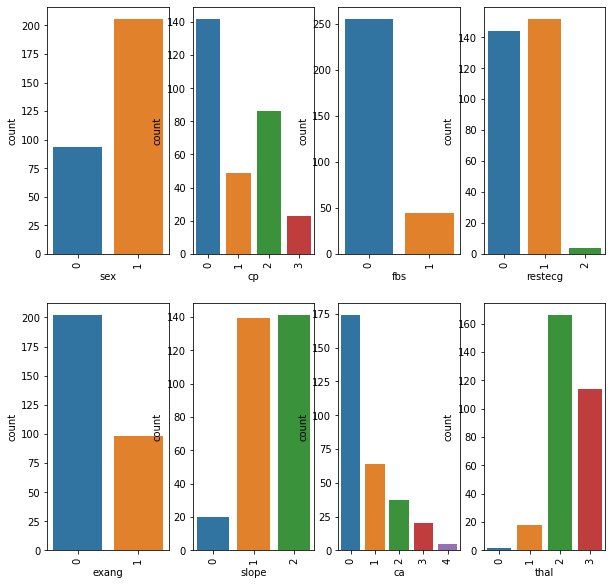

In [73]:
fig,ax=plt.subplots(2,4,figsize=(10,10))
for var2, subplot in zip(disc_var,ax.flatten()):
    sn.countplot(data[var2],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [74]:
x=data.drop(['target'],axis=1)
y=data['target']

In [75]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,4.976734,5.451038,1,0,150,0,1.193922,0,0,1
1,37,1,2,4.867534,5.521461,0,1,187,0,1.504077,0,0,2
2,41,0,1,4.867534,5.318120,0,0,172,0,0.875469,2,0,2
3,56,1,1,4.787492,5.463832,0,1,178,0,0.587787,2,0,2
4,57,0,0,4.787492,5.869297,0,1,163,1,0.470004,2,0,2


In [76]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [77]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [78]:
num_coln=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [79]:
from scipy.stats import pearsonr
corr=[]
for i in num_coln:
    corr_values=pearsonr(x[i],y)
    corr.append(corr_values)
corr  

[(-0.23110819794429488, 5.321459613822176e-05),
 (-0.2831286048146865, 6.169055458907766e-07),
 (0.43114611013212323, 5.196835983046427e-15),
 (-0.12163326000450052, 0.03522351124281877),
 (-0.10320310853415657, 0.0742878229286377),
 (-0.019936521412662833, 0.7309190067874664),
 (0.13435995941822626, 0.019910346168612814),
 (0.4169088935199623, 4.813601384134738e-14),
 (-0.4364996957003563, 2.189223542983885e-15),
 (-0.43749370745816496, 1.8614334349138687e-15),
 (0.3487660143702701, 5.241046043307298e-10),
 (-0.387539959281607, 3.4472855011336064e-12),
 (-0.3432622716418092, 1.0138390290992461e-09)]

In [80]:
corr_values1=np.array(corr)
p_values = pd.Series(corr_values1[:,1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

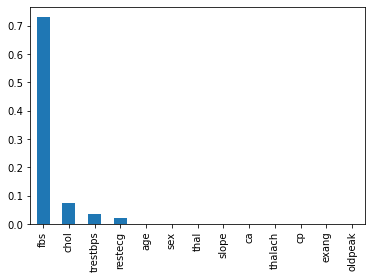

In [81]:
p_values.plot.bar()

In [82]:
p_values

fbs         7.309190e-01
chol        7.428782e-02
trestbps    3.522351e-02
restecg     1.991035e-02
age         5.321460e-05
sex         6.169055e-07
thal        1.013839e-09
slope       5.241046e-10
ca          3.447286e-12
thalach     4.813601e-14
cp          5.196836e-15
exang       2.189224e-15
oldpeak     1.861433e-15
dtype: float64

In [83]:
for i,j in enumerate(p_values):
    if j<0.05:
        print(i)

2
3
4
5
6
7
8
9
10
11
12


In [84]:
X=x.drop(['fbs'],axis=1)

In [85]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [86]:
X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,4.976734,5.451038,0,150,0,1.193922,0,0,1
1,37,1,2,4.867534,5.521461,1,187,0,1.504077,0,0,2
2,41,0,1,4.867534,5.318120,0,172,0,0.875469,2,0,2
3,56,1,1,4.787492,5.463832,1,178,0,0.587787,2,0,2
4,57,0,0,4.787492,5.869297,1,163,1,0.470004,2,0,2


# Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)

array([[ 0.95568906,  0.67550772,  1.96979274, ..., -2.29472946,
        -0.71075033, -2.14057494],
       [-1.90697403,  0.67550772,  1.00104221, ..., -2.29472946,
        -0.71075033, -0.50237983],
       [-1.46656432, -1.48036798,  0.03229168, ...,  0.97566882,
        -0.71075033, -0.50237983],
       ...,
       [ 1.5062012 ,  0.67550772, -0.93645884, ..., -0.65953032,
         1.24544324,  1.13581527],
       [ 0.2950745 ,  0.67550772, -0.93645884, ..., -0.65953032,
         0.26734646,  1.13581527],
       [ 0.2950745 , -1.48036798,  0.03229168, ..., -0.65953032,
         0.26734646, -0.50237983]])

# Data balancing

<AxesSubplot:xlabel='target', ylabel='count'>

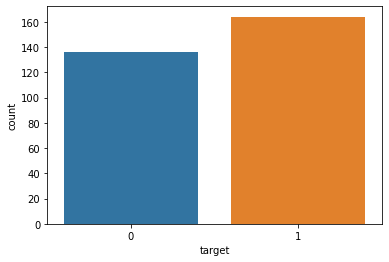

In [88]:
sn.countplot(y)

# Model building 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=42)

# checking accuracy

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
from sklearn.tree import DecisionTreeClassifier 

In [93]:
dc=DecisionTreeClassifier()

In [94]:
dc.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [95]:
y_pred_train1=dc.predict(Xtrain)
y_pred_train1

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [96]:
accuracy_score(Ytrain,y_pred_train1)

1.0

In [97]:
confusion_matrix(Ytrain,y_pred_train1)

array([[ 98,   0],
       [  0, 112]], dtype=int64)

In [98]:
print(classification_report(Ytrain,y_pred_train1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       112

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [99]:
y_pred_test1=dc.predict(Xtest)
y_pred_test1

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [100]:
accuracy_score(Ytest,y_pred_test1)

0.8333333333333334

In [101]:
confusion_matrix(Ytest,y_pred_test1)

array([[31,  7],
       [ 8, 44]], dtype=int64)

In [102]:
print(classification_report(Ytest,y_pred_test1))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.86      0.85      0.85        52

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf=RandomForestClassifier()

In [105]:
rf.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [106]:
y_pred_train2=rf.predict(Xtrain)
y_pred_train2

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [107]:
accuracy_score(Ytrain,y_pred_train2)

1.0

In [108]:
confusion_matrix(Ytrain,y_pred_train2)

array([[ 98,   0],
       [  0, 112]], dtype=int64)

In [109]:
print(classification_report(Ytrain,y_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       112

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [110]:
y_pred_test2=rf.predict(Xtest)
y_pred_test2

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [111]:
accuracy_score(Ytest,y_pred_test2)

0.8666666666666667

In [112]:
confusion_matrix(Ytest,y_pred_test2)

array([[34,  4],
       [ 8, 44]], dtype=int64)

In [113]:
print(classification_report(Ytest,y_pred_test2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.92      0.85      0.88        52

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
ada=AdaBoostClassifier()

In [116]:
ada.fit(Xtrain,Ytrain)

AdaBoostClassifier()

In [117]:
y_pred_train3=ada.predict(Xtrain)
y_pred_train3

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [118]:
accuracy_score(Ytrain,y_pred_train3)

0.9285714285714286

In [119]:
confusion_matrix(Ytrain,y_pred_train3)

array([[ 90,   8],
       [  7, 105]], dtype=int64)

In [120]:
print(classification_report(Ytrain,y_pred_train3))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        98
           1       0.93      0.94      0.93       112

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



In [121]:
y_pred_test3=ada.predict(Xtest)
y_pred_test3

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [122]:
accuracy_score(Ytest,y_pred_test3)

0.7777777777777778

In [123]:
confusion_matrix(Ytest,y_pred_test3)

array([[30,  8],
       [12, 40]], dtype=int64)

In [124]:
print(classification_report(Ytest,y_pred_test3))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        38
           1       0.83      0.77      0.80        52

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gd=GradientBoostingClassifier()

In [127]:
gd.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [128]:
y_pred_train4=gd.predict(Xtrain)
y_pred_train4

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [129]:
accuracy_score(Ytrain,y_pred_train4)

1.0

In [130]:
y_pred_test4=gd.predict(Xtest)
y_pred_test4

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [131]:
accuracy_score(Ytest,y_pred_test4)

0.8

In [166]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [167]:
parameters = {
    "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],
    "n_estimators":[100,150,200,300],
}

In [168]:
rs=RandomizedSearchCV(gd,param_distributions=parameters,scoring='accuracy',n_jobs=-1,random_state=42,n_iter=10,cv=10,verbose=3)

In [169]:
rs.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished


RandomizedSearchCV(cv=10,
                   estimator=GradientBoostingClassifier(learning_rate=0.25,
                                                        max_depth=5),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=3)

In [170]:
rs.best_estimator_

GradientBoostingClassifier(learning_rate=0.15, max_depth=6)

In [171]:
rs.best_params_

{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.15}

In [172]:
gd=GradientBoostingClassifier(learning_rate=0.25,max_depth=5,n_estimators=100)

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
cv=cross_val_score(gd,X,y,cv=10)
cv

array([0.8       , 0.83333333, 0.86666667, 0.86666667, 0.83333333,
       0.66666667, 0.63333333, 0.8       , 0.73333333, 0.8       ])

In [175]:
cv.mean()

0.7833333333333334

In [176]:
gd.fit(Xtrain,Ytrain)

GradientBoostingClassifier(learning_rate=0.25, max_depth=5)

In [177]:
y_pred_train_final=gd.predict(Xtrain)
y_pred_train_final

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [178]:
accuracy_score(Ytrain,y_pred_train_final)

1.0

In [179]:
y_pred_final_test=gd.predict(Xtest)
y_pred_final_test

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [180]:
accuracy_score(Ytest,y_pred_final_test)

0.8666666666666667